In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Data Import and Cleaning 

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats.mstats import winsorize
from scipy.stats import stats
from scipy.stats import zscore
import os
import glob
%matplotlib inline
title_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 13}
label_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}

In [23]:
os.chdir("/content/gdrive/MyDrive/Stat")
extension = 'csv'
all_filenames = 'master.csv'
# Preview the first 5 lines of the loaded data 
#combine all files in the list
df = pd.read_csv(all_filenames, encoding = "ISO-8859-1")
df.head()


,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_rate', 'country-year', 'HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

In [25]:
df.isnull().sum()
#df['city'] = df["city"].fillna('Unknown')
df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [ ]:
columns_names = ["year", "sex", "age", "generation", "country"]
for col in columns_names:
    print("{} unique values:\n {}".format(col, df[col].unique()))

GDP data should be continiues hence removing ',' in values

In [ ]:
df["gdp_for_year"].str.strip()

In [ ]:
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)
df["gdp_for_year"]

In [29]:
df["gdp_for_year"]= df["gdp_for_year"].astype("int64")
print("incorrect values for {}: ".format("gdp_for_year"))
for value in df["gdp_for_year"]:
    try:
        float(value)
    except:
        print(value)

incorrect values for gdp_for_year: 


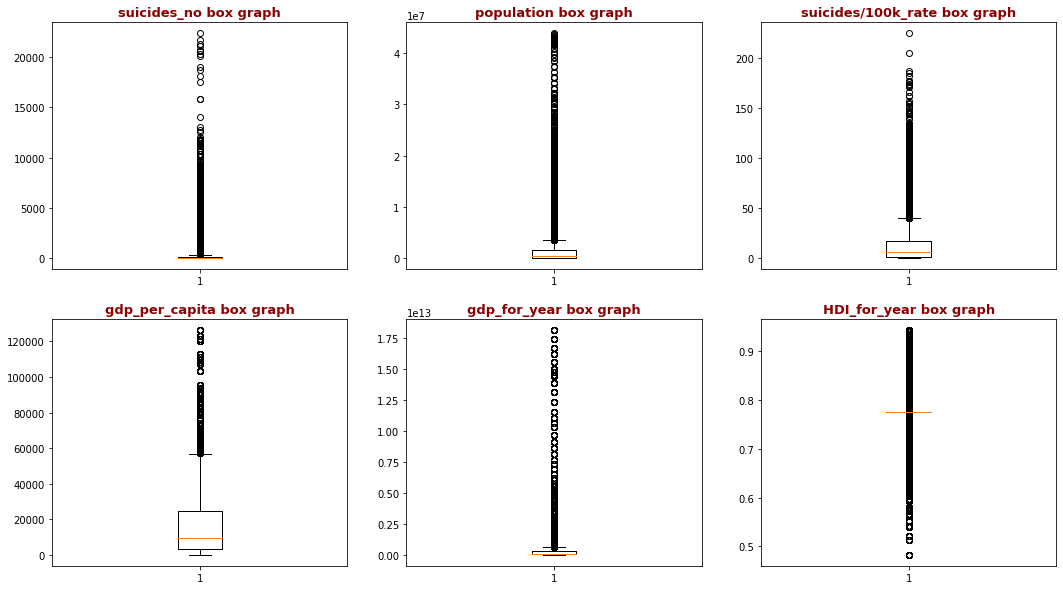

In [30]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year","HDI_for_year" ]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[columns_name[i]])
    plt.title("{} box graph".format(columns_name[i]), fontdict= title_font)

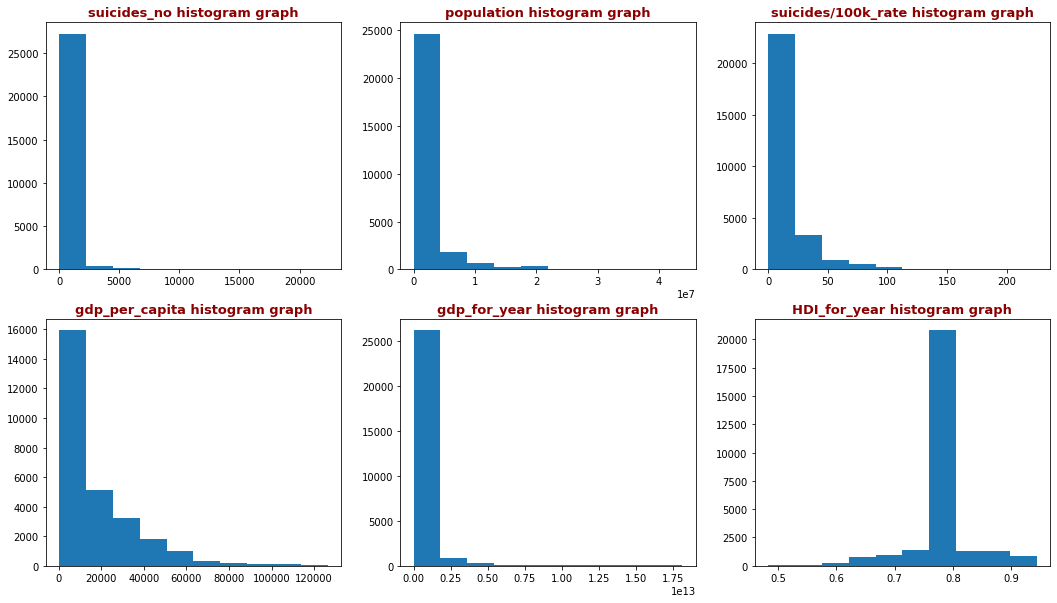

In [31]:
plt.figure(figsize=(18,10))
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year","HDI_for_year" ]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df[columns_name[i]])
    plt.title("{} histogram graph".format(columns_name[i]), fontdict=title_font)

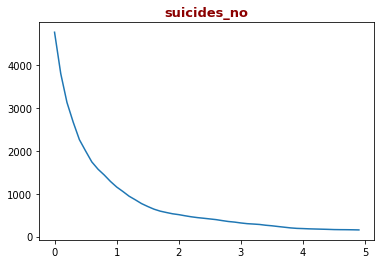

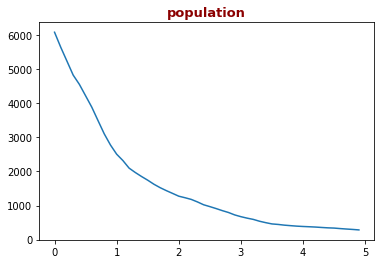

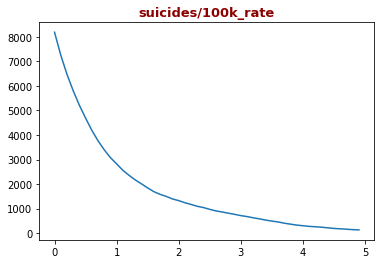

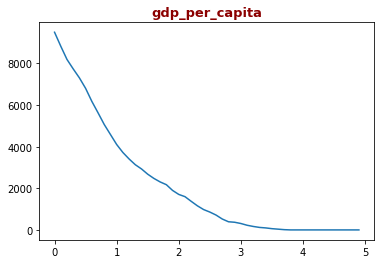

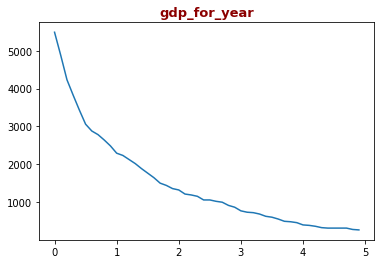

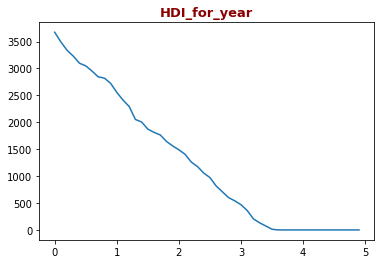

In [65]:
columns_name = ["suicides_no", "population","suicides/100k_rate", "gdp_per_capita", "gdp_for_year" ,"HDI_for_year" ]
for names in range(0,6): 
    zscorelist = []
    zscores = zscore(df[columns_name[names]])
    for thereshold in np.arange(0,5,0.1):
        zscorelist.append((thereshold,len(np.where(zscores>thereshold)[0]))) 
        df_outliers= pd.DataFrame(zscorelist, columns=["thereshold", "outliers"])
    plt.plot(df_outliers.thereshold, df_outliers.outliers)
    plt.title(columns_name[names], fontdict=title_font)
    plt.show()
    

In [33]:
#Removing Outliers
df.drop(df.loc[np.abs(np.abs(stats.zscore(df['gdp_per_capita']))>3)].index, inplace=True)
df.drop(df.loc[np.abs(np.abs(stats.zscore(df['gdp_for_year']))>3)].index, inplace=True)
df.drop(df.loc[np.abs(np.abs(stats.zscore(df['HDI_for_year']))>3)].index, inplace=True)
df
    

,country,year,sex,age,suicides_no,population,suicides/100k_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675000,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675000,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675000,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675000,63067077179,2309,Generation Z


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



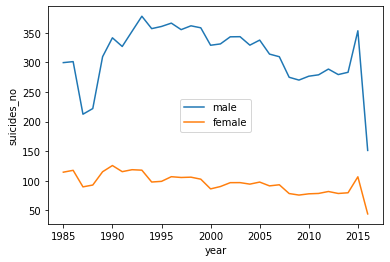

In [34]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()



The suicide rate in men is always higher than suicide rate in women over years

#Suicides and gdp:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



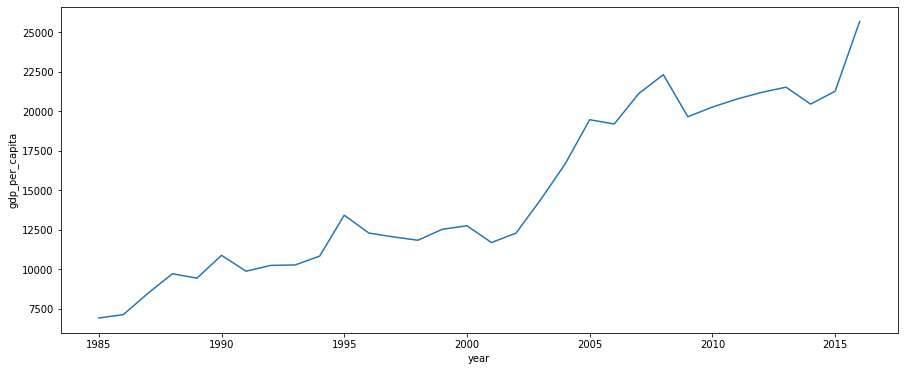

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(df.year, df.gdp_per_capita, ci = None)

In [36]:
df_sumByCountry = df.groupby(["country"]).agg({'gdp_per_capita': 'mean', 'suicides_no' : 'sum', 'population' : "sum",'HDI_for_year' : "mean"}).sort_values(by=['suicides_no'],  ascending=False).reset_index()

df_sumByCountry.head(5)

df_sumByCountry["Suicides/Population"] = df_sumByCountry.suicides_no/df_sumByCountry.population
df_sumByCountry = df_sumByCountry.sort_values(by=['Suicides/Population'],  ascending=False)
df_sumByCountry.tail(30)
df_sumByCountry["Suicides/Population"].mean()

0.00011066591302013124

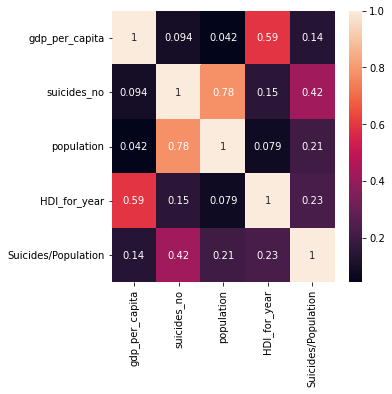

In [37]:
temp = df_sumByCountry.groupby('country').sum()
temp
fig, ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(temp.corr(method='kendall'), annot=True)

Text(0, 0.5, 'Suicide/Population')

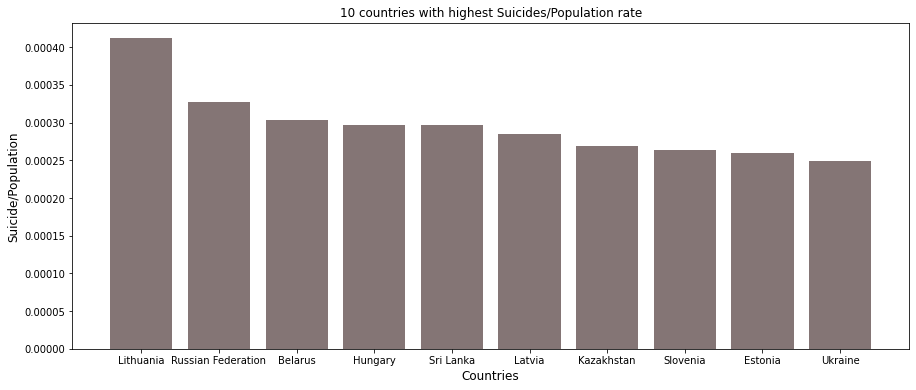

In [38]:
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].head(10), df_sumByCountry["Suicides/Population"].head(10),color=(0.2, 0.1, 0.1, 0.6))
plt.title('10 countries with highest Suicides/Population rate')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Suicide/Population', fontsize=12)

Text(0, 0.5, 'Suicide/Population')

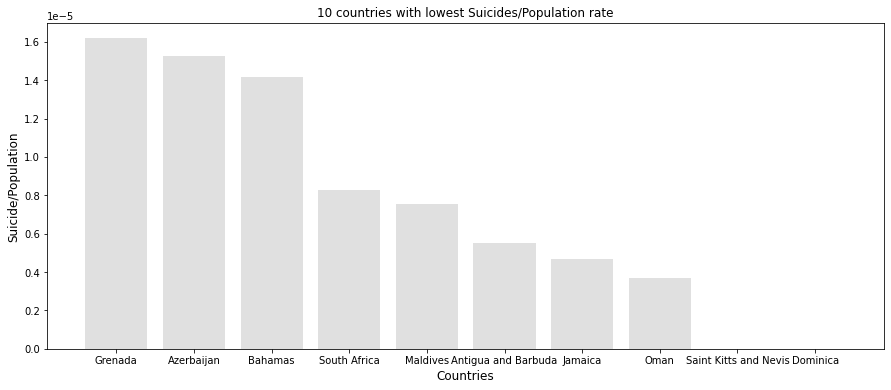

In [39]:
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].tail(10), df_sumByCountry["Suicides/Population"].tail(10),color=(0.8, 0.8, 0.8, 0.6))
plt.title('10 countries with lowest Suicides/Population rate')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Suicide/Population', fontsize=12)

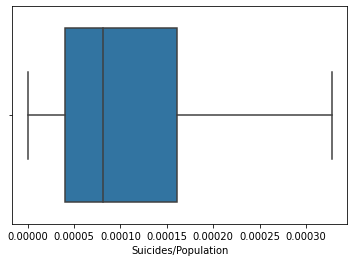

In [42]:
ax = sns.boxplot(x=df_sumByCountry["Suicides/Population"],showfliers=False)

In [43]:
conditions = [
    (df_sumByCountry["Suicides/Population"] >= 0.0003),
    (df_sumByCountry["Suicides/Population"] < 0.0003) & (df_sumByCountry["Suicides/Population"] >= 0.00015),
    (df_sumByCountry["Suicides/Population"] < 0.00015) & (df_sumByCountry["Suicides/Population"] >= 0.000075),
    (df_sumByCountry["Suicides/Population"] < 0.000075) & (df_sumByCountry["Suicides/Population"] >= 0.000)]
values = ["Very high", "Hign", "Moderate", "Low"]
df_sumByCountry["Rating"] = np.select(conditions, values)
df_sumByCountry.head(20)

,country,gdp_per_capita,suicides_no,population,HDI_for_year,Suicides/Population,Rating
33,Lithuania,9280.549618,28039,68085210,0.786457,0.000412,Very high
0,Russian Federation,6518.814815,1209742,3690802620,0.776601,0.000328,Very high
20,Belarus,3333.904762,59892,197372292,0.775315,0.000303,Very high
16,Hungary,9370.051613,73891,248644256,0.785047,0.000297,Hign
25,Sri Lanka,951.600000,49973,168668626,0.766841,0.000296,Hign
44,Latvia,8961.095238,12770,44852640,0.779515,0.000285,Hign
12,Kazakhstan,5329.115385,101546,377513869,0.764239,0.000269,Hign
50,Slovenia,18642.238095,10615,40268619,0.807039,0.000264,Hign
56,Estonia,11376.095238,7034,27090810,0.794325,0.000260,Hign
3,Ukraine,1867.535714,319950,1286469184,0.758572,0.000249,Hign


[(0.0, 80000.0)]

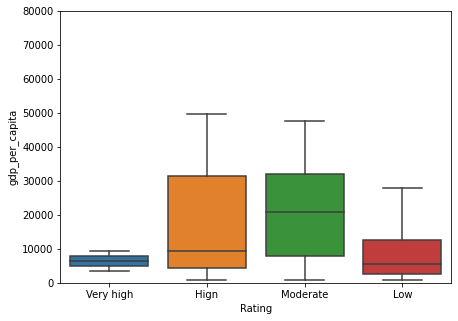

In [44]:
plt.figure(figsize=(7,5))
ax = sns.boxplot(x="Rating", y="gdp_per_capita", data=df_sumByCountry, showfliers=False)
ax.set(ylim=(0, 80000))

As per above boxplot the number of suicide i.e(high,very high, moderate and low) is almost same for very high and low with respective GDP 

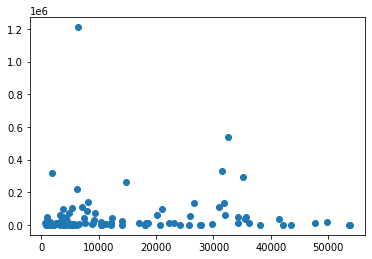

In [45]:
plt.scatter(df_sumByCountry.gdp_per_capita, df_sumByCountry.suicides_no)


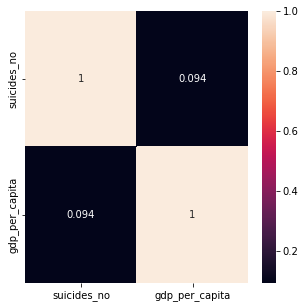

In [46]:
fig, ax=plt.subplots(figsize=(5,5))
df1 = df_sumByCountry[['suicides_no','gdp_per_capita']]
ax=sns.heatmap(df1.corr(method='kendall'), annot=True)

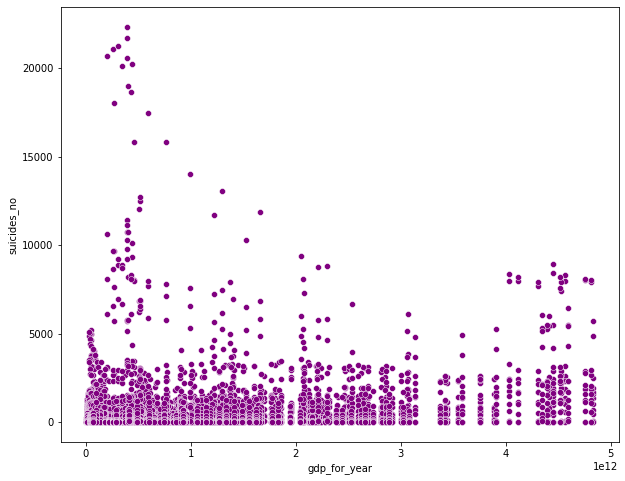

In [47]:
## Checking the relationship between gdp for year and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_for_year", y="suicides_no", data=df, color='purple')

The relationship between "gdp_for_year" and "suicides_no" is not linear. Hence, GDP is not something that has a real impact on suicide rate

## Checking the relationship between Hdi and number of suicides


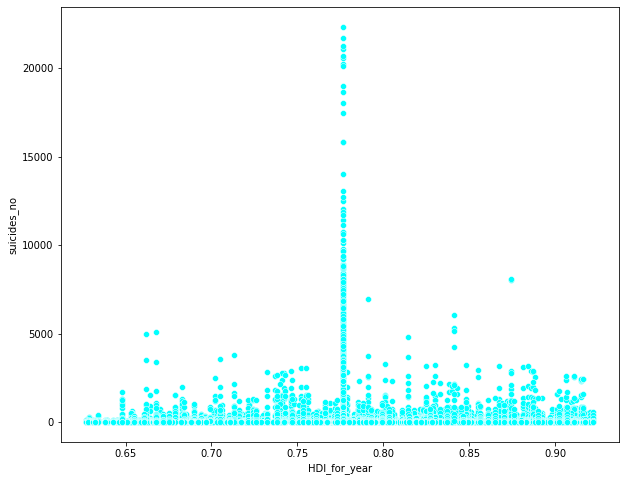

In [48]:
## Checking the relationship between Hdi and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="HDI_for_year", y="suicides_no", data=df, color='cyan')

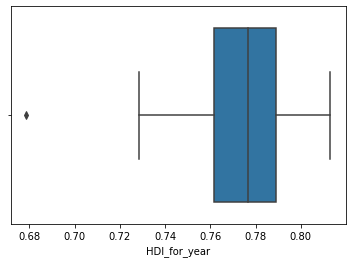

In [49]:
ax = sns.boxplot(x=df_sumByCountry["HDI_for_year"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



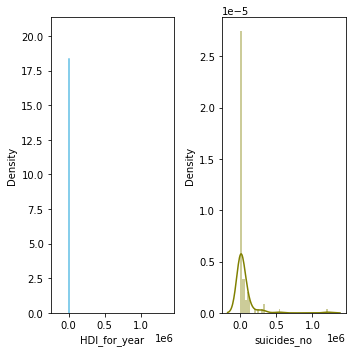

In [59]:
#Check for distribution
f, axes = plt.subplots(1, 2, figsize=(5, 5), sharex=True)
sns.distplot(df_sumByCountry['HDI_for_year'], color="skyblue", ax=axes[0])
sns.distplot(df_sumByCountry['suicides_no'], color="olive", ax=axes[1])
plt.tight_layout()

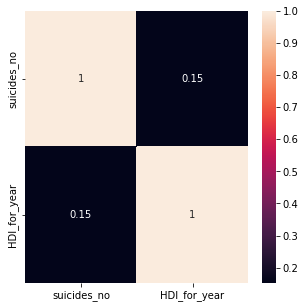

In [51]:
fig, ax=plt.subplots(figsize=(5,5))
df1 = df_sumByCountry[['suicides_no','HDI_for_year']]
ax=sns.heatmap(df1.corr(method='kendall'), annot=True)

As per the above box plot and scatterplot and Heatmap
we don't see any relationship of HDI and suicide numbers 

#summary
As per above EDA the HDI of country over year does not affect the suicide in the country.\
It is also observed that the its not neccasry if the gpd incresases it will descrese the number of sucide it is observed that number of suicide in country with high GDP can we almost same as the suicide in country with low GDP.\
The suicide rate in the men is always higher than women in every year. 